In [227]:
import pandas as pd
import numpy as np
#https://github.com/codescrum/
#https://github.com/willyii/

In [165]:
listingsSummary = pd.read_csv("D:/Raghvendra/Masters/Irish Applications/DCU/DCU subjects study/Sem2_CA683 data analytics and data mining/Main Assignment/berlin airbnb 2020/listings_summary.csv")

C:\Users\Raghvendra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [94]:
listingsSummary.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20200218053611,2020-02-18,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.12
1,3309,https://www.airbnb.com/rooms/3309,20200218053611,2020-02-19,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.34
2,6883,https://www.airbnb.com/rooms/6883,20200218053611,2020-02-19,Stylish East Side Loft in Center with AC & 2 b...,NaN,Stay in a stylish loft on the second floor and...,Stay in a stylish loft on the second floor and...,none,The emerging and upcoming East of the new hip ...,...,f,f,moderate,f,t,1,1,0,0,1.08


let's check the null values to decide whether to keep or not

In [95]:
print("the shape of listings_summary.csv is - ", listingsSummary.shape)

the shape of listings_summary.csv is -  (25197, 106)


In [96]:
listingsSummary.apply(lambda x: sum(x.isnull()))

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              51
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               4449
Length: 106, dtype: int64

Under the data cleaning, let's select the columns which are required for our analysis

In [169]:
#featuresRequired = ['name', 'neighbourhood_cleansed', 'room_type', 'guests_included', 'minimum_nights',
  #                   'number_of_reviews', 'review_scores_rating', 'amenities', 'property_type',
    #                 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price']

featuresRequired = ['name', 'neighbourhood_cleansed', 'room_type', 'guests_included', 'minimum_nights', 'reviews_per_month'
                     ,'number_of_reviews', 'review_scores_rating', 'amenities', 'property_type',
                     'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'latitude', 'longitude',]

In [170]:
listingsSummary = listingsSummary.copy()[featuresRequired]
listingsSummary.rename(columns = {'neighbourhood_cleansed':'neighbourhood'}, inplace = True)

In [171]:
listingsSummary.head(3)

,name,neighbourhood,room_type,guests_included,minimum_nights,reviews_per_month,number_of_reviews,review_scores_rating,amenities,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,latitude,longitude
0,Fabulous Flat in great Location,Prenzlauer Berg Südwest,Entire home/apt,2,62,1.12,145,93.0,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",Apartment,4,1.0,1.0,2.0,Real Bed,$90.00,52.53500,13.41758
1,BerlinSpot Schöneberg near KaDeWe,Schöneberg-Nord,Private room,1,7,0.34,27,89.0,"{Internet,Wifi,""Pets live on this property"",Ca...",Apartment,1,1.0,1.0,1.0,Pull-out Sofa,$28.00,52.49885,13.34906
2,Stylish East Side Loft in Center with AC & 2 b...,Frankfurter Allee Süd FK,Entire home/apt,1,3,1.08,132,99.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Loft,2,1.0,1.0,1.0,Real Bed,$125.00,52.51171,13.45477


In [172]:
listingsSummary.tail(3)

,name,neighbourhood,room_type,guests_included,minimum_nights,reviews_per_month,number_of_reviews,review_scores_rating,amenities,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,latitude,longitude
25194,Kreuzberg / Schlesisches Tor,südliche Luisenstadt,Private room,1,1,NaN,0,NaN,"{TV,Wifi,Kitchen,""Smoking allowed"",""Pets allow...",Apartment,2,1.0,0.0,1.0,Real Bed,$38.00,52.499230,13.441180
25195,Eastside Flat inkl. Wlan,Hellersdorf-Nord,Private room,1,1,NaN,0,NaN,"{TV,Wifi,Kitchen,Breakfast,Heating,Washer,""Smo...",Apartment,2,1.0,1.0,2.0,Real Bed,$16.00,52.541520,13.606460
25196,Simple and Cozy 1-Bedroom Apartment in Wedding,Parkviertel,Entire home/apt,1,3,NaN,0,NaN,"{TV,Wifi,Kitchen,Heating,Washer,""Smoke detecto...",Apartment,3,1.0,1.0,2.0,Real Bed,$45.00,52.554863,13.342667


we see that price is with special symbols. We need to clean it.

In [173]:
priceUpdated = listingsSummary['price'].map(lambda p: int(p[1:-3].replace(",", "")))
listingsSummary['price'] = priceUpdated
listingsSummary['price'].describe()

count    25197.000000
mean        73.849863
std        225.236453
min          0.000000
25%         35.000000
50%         50.000000
75%         79.000000
max       9000.000000
Name: price, dtype: float64

Now, let's check missing values

In [174]:
listingsSummary.apply(lambda x: sum(x.isnull()))

name                      51
neighbourhood              0
room_type                  0
guests_included            0
minimum_nights             0
reviews_per_month       4449
number_of_reviews          0
review_scores_rating    4959
amenities                  0
property_type              0
accommodates               0
bathrooms                 20
bedrooms                  32
beds                     169
bed_type                   0
price                      0
latitude                   0
longitude                  0
dtype: int64

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

Now, let's check the relation between price and other features...

First, we will check the relationship between price and the type of each room

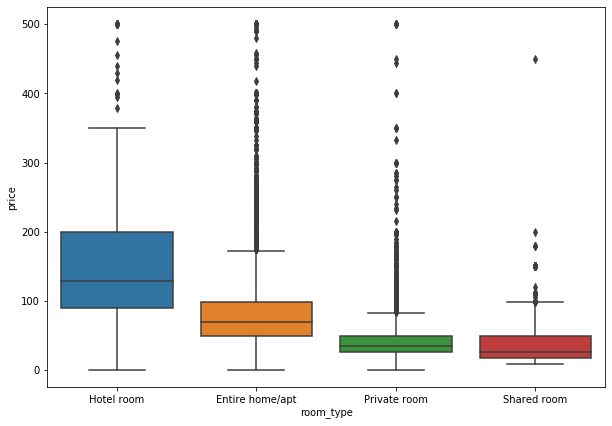

In [176]:
roomPrice = listingsSummary.query('price <= 500').groupby('room_type')['price'].median()\
                    .sort_values(ascending=False).index
                
output = listingsSummary.query('price <= 500')

plt.figure(figsize=(10,7))
sns.boxplot(y=output['price'], x=output['room_type'], order=roomPrice)
plt.show()

As we can see above, a hotel room is quite expensive in comparision to an entire home or apartment.
No wonder why tourists run behind Airbnb these days. Also, a private room is much cheaper than house.

Moreover, without any surprise, a sharedroom is cheapest among all

In [177]:
#to get unique values of neighbourhoods
#https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/
listingsSummary.neighbourhood.unique()

array(['Prenzlauer Berg Südwest', 'Schöneberg-Nord',
       'Frankfurter Allee Süd FK', 'Helmholtzplatz',
       'Prenzlauer Berg Nordwest', 'nördliche Luisenstadt',
       'Reuterstraße', 'südliche Luisenstadt', 'Brunnenstr. Süd',
       'Tempelhofer Vorstadt', 'Prenzlauer Berg Süd', 'Moabit Ost',
       'Otto-Suhr-Allee', 'Schillerpromenade', 'Alt  Treptow',
       'Alexanderplatz', 'Neue Kantstraße', 'Ostpreußendamm',
       'Schmöckwitz/Karolinenhof/Rauchfangswerder',
       'Neuköllner Mitte/Zentrum', 'Frankfurter Allee Nord',
       'Prenzlauer Berg Nord', 'Kantstraße', 'Schmargendorf',
       'Regierungsviertel', 'Kurfürstendamm', 'Schöneberg-Süd',
       'Blankenfelde/Niederschönhausen', 'Halensee',
       'Südliche Friedrichstadt', 'Moabit West', 'Wiesbadener Straße',
       'West 3', 'Rixdorf', 'Neu Lichtenberg',
       'Blankenburg/Heinersdorf/Märchenland', 'Friedenau',
       'Brunnenstr. Nord', 'Ost 2', 'Volkspark Wilmersdorf',
       'Pankow Zentrum', 'Osloer Straße', 'Dr

In [178]:
#to get number of unique values of neighbourhoods
#https://stackoverflow.com/questions/38309729/count-unique-values-with-pandas-per-groups
listingsSummary.neighbourhood.nunique()

137

However, as seen above, it would be hard to visualize a clear picture due to 137 neighbourhoods.

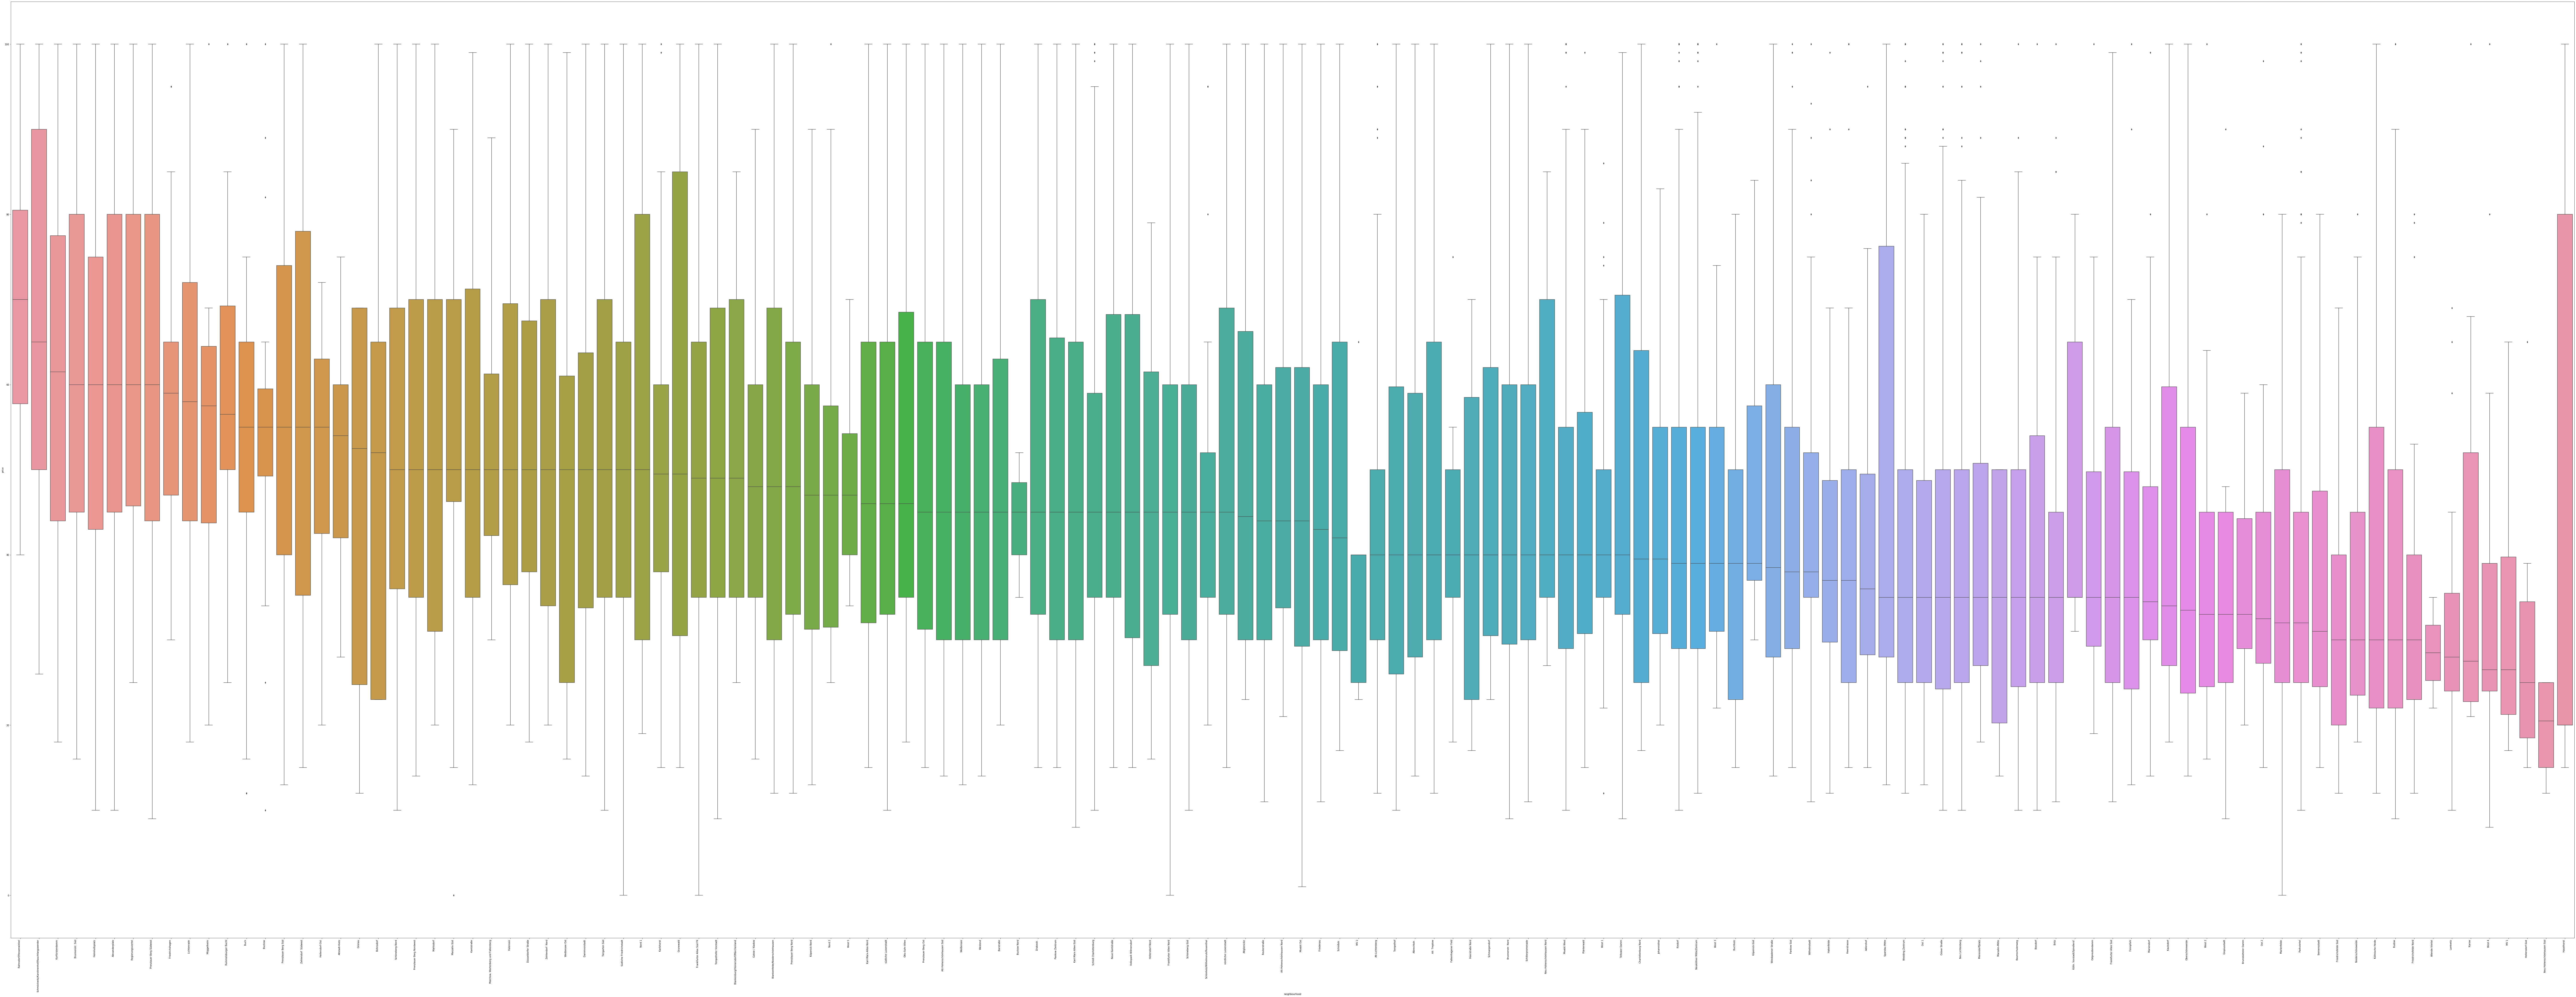

In [179]:
propertyPrice = listingsSummary.query('price <= 100').groupby('neighbourhood')['price'].median()\
                                .sort_values(ascending=False).index
                
output = listingsSummary.query('price <= 100')

plt.figure(figsize=(200,75))
sns.boxplot(y=output['price'], x=output['neighbourhood'], order=propertyPrice)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

In [180]:
import re

I am planning to work on amenities column. So, let's first do the cleaning.


In [181]:
%%time
regex = r"{([^}]*)}"
regex2 = r"translation.\w\D+.."
listingsAmenities = listingsSummary.copy()
listingsAmenities['amenities'] = listingsAmenities['amenities'].map(lambda amns: re.search(regex, amns).group(1))
listingsAmenities['amenities'] = listingsAmenities['amenities'].map(lambda amns: re.sub(regex2, '', amns))
listingsAmenities['amenities'] = listingsAmenities['amenities'].map(lambda amns: amns.replace("\"", ""))

Wall time: 408 ms


Now, we will add the values of amenities as columns for our regression analysis

In [182]:
# The code for adding the amenities colums is currently commented for practicality
listingsAmenityColumns = listingsAmenities.amenities.str.get_dummies(sep = ",")
amenities_cols = listingsAmenityColumns.columns.values
output = pd.concat([listingsAmenities, listingsAmenityColumns], axis=1)
output = listingsAmenities.query('price <= 500')
output = output.drop('amenities', axis=1)
output = output.drop('name', axis=1)

let us check most popular amenities

In [183]:
listingsAmenityColumns[amenities_cols].apply(lambda x: sum(x == 1)).sort_values(ascending=False)

Wifi           24065
Heating        23889
Kitchen        23636
Essentials     23072
Washer         20502
               ...  
Bidet              1
Hammock            1
HBO GO             1
Fax machine        1
Wine cooler        1
Length: 177, dtype: int64

Now, as we have updated dataframe we can now work on null values.

1. As of now, in place of deleting the null values, we will fill them with median

In [184]:
output['bedrooms'] = output['bedrooms'].fillna(output['bedrooms'].median())
output['review_scores_rating'] = output['review_scores_rating'].fillna(output['review_scores_rating'].median())
output['beds'] = output['beds'].fillna(output['beds'].median())
output['bathrooms'] = output['bathrooms'].fillna(output['bathrooms'].median())



In [185]:
output.head(3)

,neighbourhood,room_type,guests_included,minimum_nights,reviews_per_month,number_of_reviews,review_scores_rating,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,latitude,longitude
0,Prenzlauer Berg Südwest,Entire home/apt,2,62,1.12,145,93.0,Apartment,4,1.0,1.0,2.0,Real Bed,90,52.53500,13.41758
1,Schöneberg-Nord,Private room,1,7,0.34,27,89.0,Apartment,1,1.0,1.0,1.0,Pull-out Sofa,28,52.49885,13.34906
2,Frankfurter Allee Süd FK,Entire home/apt,1,3,1.08,132,99.0,Loft,2,1.0,1.0,1.0,Real Bed,125,52.51171,13.45477


Now, for our machine learning models, we need to encode the categorical values.

In [200]:
#import necessary libraries

from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold

from collections import defaultdict

In [201]:
d = defaultdict(preprocessing.LabelEncoder)
categoricalColumns = ['neighbourhood', 'room_type', 'property_type', 'bed_type']
encodedDataset = output.apply(
    lambda x: d[x.name].fit_transform(x) if x.name in categoricalColumns else x)

In [202]:
encodedDataset.head(3)

,neighbourhood,room_type,guests_included,minimum_nights,reviews_per_month,number_of_reviews,review_scores_rating,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,latitude,longitude
0,99,0,2,62,1.12,145,93.0,1,4,1.0,1.0,2.0,4,90,52.53500,13.41758
1,111,2,1,7,0.34,27,89.0,1,1,1.0,1.0,1.0,3,28,52.49885,13.34906
2,33,0,1,3,1.08,132,99.0,24,2,1.0,1.0,1.0,4,125,52.51171,13.45477


Now, we can see that every value is numerical. Now, we are good to go with machine learning models

Now, let's divide the data into test and train

In [203]:
trainDataset, testDataset = train_test_split(encoded_dataset, test_size=0.2, random_state=8)
training, validation = train_test_split(trainDataset, test_size=0.1, random_state=8)


print("Actual size of dataset - ", encoded_dataset.shape)
print("Size of training dataset -  ", training.shape)
print("Size of testing dataset - ", testDataset.shape)
print("Size of validation dataset - ", validation.shape)

Actual size of dataset -  (25068, 13)
Size of training dataset -   (18048, 13)
Size of testing dataset -  (5014, 13)
Size of validation dataset -  (2006, 13)


In [204]:
def fit_model(model, training, validation, cross_val=False, cv_folds=5):
    predictors = [x for x in training.columns if x not in ['price']]
    model.fit(training[predictors], training['price'])
    #Predict values:
    training_predictions = model.predict(training[predictors])
    validation_predictions = model.predict(validation[predictors])
    model_report(training, validation, training_predictions, validation_predictions)

    if cross_val:
        evaluate_cross_validation(model, training, cv_folds)

In [205]:
def model_report(training, validation, training_predictions, validation_predictions):
    #Print model report:
    print("\nModel Report")
    print("Training")
    print("Mean Absolute Error : %.4g" % mean_absolute_error(training['price'].values, training_predictions))
    print("Root Mean Squared Error : %.4g" % np.sqrt(mean_squared_error(training['price'].values, training_predictions)))
    print("R2 Score: : %4f" % r2_score(training['price'].values, training_predictions))
    print("\n")
    print("Validation")
    print("Mean Absolute Error : %.4g" % mean_absolute_error(validation['price'].values, validation_predictions))
    print("Root Mean Squared Error : %.4g" % np.sqrt(mean_squared_error(validation['price'].values, validation_predictions)))
    print("R2 Score: %4f" % r2_score(validation['price'].values, validation_predictions))

In [217]:
#https://www.geeksforgeeks.org/ml-implementation-of-knn-classifier-using-sklearn/
#%%time
predictors = [x for x in training.columns if x not in ['price']]
decision_tree = DecisionTreeRegressor(random_state=8)
fit_model(decision_tree, training, validation, cross_val=False)


Model Report
Training
Mean Absolute Error : 1.2
Root Mean Squared Error : 6.676
R2 Score: : 0.981852


Validation
Mean Absolute Error : 29
Root Mean Squared Error : 46.35
R2 Score: 0.063361


In [218]:
#https://www.geeksforgeeks.org/ml-implementation-of-knn-classifier-using-sklearn/
#%%time
predictors = [x for x in training.columns if x not in ['price']]
#decision_tree = DecisionTreeRegressor(random_state=8)
for k in range(2, 21):
    print("New K starts")
    print("value of k is")
    print(k)
    knn = KNeighborsClassifier(n_neighbors = 10) 
    fit_model(knn, training, validation, cross_val=False)

New K starts
value of k is
2

Model Report
Training
Mean Absolute Error : 28.47
Root Mean Squared Error : 51.09
R2 Score: : -0.062583


Validation
Mean Absolute Error : 32.29
Root Mean Squared Error : 52.36
R2 Score: -0.195601
New K starts
value of k is
3

Model Report
Training
Mean Absolute Error : 28.47
Root Mean Squared Error : 51.09
R2 Score: : -0.062583


Validation
Mean Absolute Error : 32.29
Root Mean Squared Error : 52.36
R2 Score: -0.195601
New K starts
value of k is
4

Model Report
Training
Mean Absolute Error : 28.47
Root Mean Squared Error : 51.09
R2 Score: : -0.062583


Validation
Mean Absolute Error : 32.29
Root Mean Squared Error : 52.36
R2 Score: -0.195601
New K starts
value of k is
5

Model Report
Training
Mean Absolute Error : 28.47
Root Mean Squared Error : 51.09
R2 Score: : -0.062583


Validation
Mean Absolute Error : 32.29
Root Mean Squared Error : 52.36
R2 Score: -0.195601
New K starts
value of k is
6

Model Report
Training
Mean Absolute Error : 28.47
Root Mean Sq

# KNN

In [219]:
#https://github.com/willyii/CS235-New-York-Airbnb/blob/master/KNN/knn_price_prediction.ipynb

from sklearn import preprocessing
cols = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']
data = listingsSummary[cols].copy()
data = data.dropna()

# Scramble the data into three groups
data_shuffle = data.sample(frac = 1, random_state=0)
n1 = int(len(data)*(0.8))
n2 = int(len(data)*(0.9))

data_train = data_shuffle[:n1]
data_test1 = data_shuffle[n1:n2]
data_test2 = data_shuffle[n2:]

scaler = preprocessing.StandardScaler().fit(data_train)
data_norm_train = pd.DataFrame(scaler.transform(data_train), columns = cols)
data_norm_test1 = pd.DataFrame(scaler.transform(data_test1), columns = cols)
data_norm_test2 = pd.DataFrame(scaler.transform(data_test2), columns = cols)

In [220]:
from sklearn.neighbors import KNeighborsRegressor
factors = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']
target = ['price']
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(data_norm_train[factors], data_norm_train[target])

data_norm_train['predict_price'] = knn_reg.predict(data_norm_train[factors])
data_norm_test1['predict_price'] = knn_reg.predict(data_norm_test1[factors])
data_norm_test2['predict_price'] = knn_reg.predict(data_norm_test2[factors])

In [221]:
from sklearn.metrics import mean_squared_error
rmse1 = mean_squared_error(data_norm_train[target], data_norm_train['predict_price'])**0.5
print('RMSE pf the training data: %.2f' %rmse1)
rmse2 = mean_squared_error(data_norm_test1[target], data_norm_test1['predict_price'])**0.5
print('RMSE pf the test data1: %.2f' %rmse2)
rmse3 = mean_squared_error(data_norm_test2[target], data_norm_test2['predict_price'])**0.5
print('RMSE pf the test data2: %.2f' %rmse3)

RMSE pf the training data: 0.84
RMSE pf the test data1: 0.42
RMSE pf the test data2: 0.49


In [224]:
lst_rmse_train = []
lst_rmse_test1 = []
lst_rmse_test2 = []
for i in range(2, 40):
    knn_reg = KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(data_norm_train[factors], data_norm_train[target])
    data_norm_train['predict_price'] = knn_reg.predict(data_norm_train[factors])
    data_norm_test1['predict_price'] = knn_reg.predict(data_norm_test1[factors])
    data_norm_test2['predict_price'] = knn_reg.predict(data_norm_test2[factors])
    
    rmse1 = mean_squared_error(data_norm_train[target], data_norm_train['predict_price'])**0.5
    rmse2 = mean_squared_error(data_norm_test1[target], data_norm_test1['predict_price'])**0.5
    rmse3 = mean_squared_error(data_norm_test2[target], data_norm_test2['predict_price'])**0.5

    lst_rmse_train.append(rmse1)
    lst_rmse_test1.append(rmse2)
    lst_rmse_test2.append(rmse3)

Text(0, 0.5, 'RMSE')

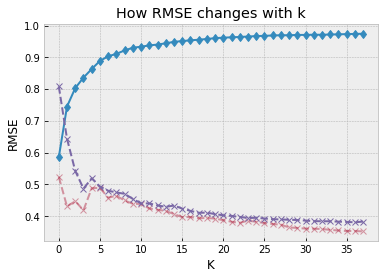

In [225]:
import matplotlib.style as psl
psl.use('bmh')
plt.plot(lst_rmse_train, linestyle = '-', marker = 'd')
plt.plot(lst_rmse_test1, linestyle = '--', marker = 'x', alpha = 0.4)
plt.plot(lst_rmse_test2, linestyle = '--', marker = 'x', alpha = 1)
plt.title("How RMSE changes with k")
plt.xlabel("K")
plt.ylabel("RMSE")

In [226]:
my = np.array([40.76404, -73.98933, 7, 0, 0, 9999]).reshape(1, -1)
a = pd.DataFrame(scaler.transform(my), columns = cols)
a = a.drop('price', axis = 1)
predicted_price_scaled = knn_reg.predict(a)

mu = data_train['price'].describe()['mean']
std = data_train['price'].describe()['std']
predicted_price_dollar = predicted_price_scaled*std + mu
print('\n predict my house rent price, here are my house attributes:')
for i in range(len(factors)):
    print('    ', factors[i], ':', my[0][i])
print('predicted price is : ', float(predicted_price_dollar))


 predict my house rent price, here are my house attributes:
     latitude : 40.76404
     longitude : -73.98933
     minimum_nights : 7.0
     number_of_reviews : 0.0
     reviews_per_month : 0.0
predicted price is :  152.48966493523665
